<a href="https://colab.research.google.com/github/Ferdianap/python_for_datascience/blob/main/LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data



**Link Dataset :**
https://www.kaggle.com/datasets/bhadramohit/customer-shopping-latest-trends-dataset

# PREDIKSI DENGAN REGRESI LOGSTIK

## Import Library

In [ ]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

## Load Data

In [ ]:
df = pd.read_csv('/content/shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## Data Understanding

In [ ]:
df.shape

(3900, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## EDA

In [ ]:
# Check missing value

df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Gender'] = df['Gender'].astype(object)

In [ ]:
#Encode 'Category'
label_encoder = LabelEncoder()
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])
df.drop(columns=['Category'], inplace=True)
print("Encoding 'Category' completed:")
print(df.head())

Encoding 'Category' completed:
   Customer ID  Age Gender Item Purchased  Purchase Amount (USD)  \
0            1   55      0         Blouse                     53   
1            2   19      0        Sweater                     64   
2            3   50      0          Jeans                     73   
3            4   21      0        Sandals                     90   
4            5   45      0         Blouse                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo Code Used  \
0    Credit Card 

Interprestasi Encoding Gender
Kolom Gender dikodekan menjadi numerik:

0: Female

1: Male

Ini mempermudah pengolahan data dalam analisis statistik.

In [ ]:
# Encode 'Item Purchased'
df['item'] = label_encoder.fit_transform(df['Item Purchased'])
df.drop(columns=['Item Purchased'], inplace=True)
print("Encoding 'Item Purchased' completed:")
print(df.head())

Encoding 'Item Purchased' completed:
   Customer ID  Age Gender  Purchase Amount (USD)       Location Size  \
0            1   55      0                     53       Kentucky    L   
1            2   19      0                     64          Maine    L   
2            3   50      0                     73  Massachusetts    S   
3            4   21      0                     90   Rhode Island    M   
4            5   45      0                     49         Oregon    M   

       Color  Season  Review Rating Subscription Status Payment Method  \
0       Gray  Winter            3.1                 Yes    Credit Card   
1     Maroon  Winter            3.1                 Yes  Bank Transfer   
2     Maroon  Spring            3.1                 Yes           Cash   
3     Maroon  Spring            3.5                 Yes         PayPal   
4  Turquoise  Spring            2.7                 Yes           Cash   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0     

Interprestasi Encoding Item Purchased:

Telah di-encode menjadi kolom item. Nilai numeriknya tampaknya menggambarkan kategori dari barang yang dibeli

In [ ]:
#Encode 'Subscription Status'
df['subscription_status_encoded'] = label_encoder.fit_transform(df['Subscription Status'])
df.drop(columns=['Subscription Status'], inplace=True)
print("Encoding 'Subscription Status' completed:")
print(df.head())

Encoding 'Subscription Status' completed:
   Customer ID  Age Gender  Purchase Amount (USD)       Location Size  \
0            1   55      0                     53       Kentucky    L   
1            2   19      0                     64          Maine    L   
2            3   50      0                     73  Massachusetts    S   
3            4   21      0                     90   Rhode Island    M   
4            5   45      0                     49         Oregon    M   

       Color  Season  Review Rating Payment Method  Shipping Type  \
0       Gray  Winter            3.1    Credit Card        Express   
1     Maroon  Winter            3.1  Bank Transfer        Express   
2     Maroon  Spring            3.1           Cash  Free Shipping   
3     Maroon  Spring            3.5         PayPal   Next Day Air   
4  Turquoise  Spring            2.7           Cash  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases  \
0              Yes             Yes            

Interprestasi Encoding Subscription Status:

Setelah encoding, kolom ini dihapus, dan diganti menjadi subscription_status_encoded. Nilai 0 atau 1 menunjukkan status langganan pengguna.

In [ ]:
# Encode 'Payment Method'
df['payment_method_encoded'] = label_encoder.fit_transform(df['Payment Method'])
df.drop(columns=['Payment Method'], inplace=True)
print("Encoding 'Payment Method' completed:")
print(df.head())

Encoding 'Payment Method' completed:
   Customer ID  Age Gender  Purchase Amount (USD)       Location Size  \
0            1   55      0                     53       Kentucky    L   
1            2   19      0                     64          Maine    L   
2            3   50      0                     73  Massachusetts    S   
3            4   21      0                     90   Rhode Island    M   
4            5   45      0                     49         Oregon    M   

       Color  Season  Review Rating  Shipping Type Discount Applied  \
0       Gray  Winter            3.1        Express              Yes   
1     Maroon  Winter            3.1        Express              Yes   
2     Maroon  Spring            3.1  Free Shipping              Yes   
3     Maroon  Spring            3.5   Next Day Air              Yes   
4  Turquoise  Spring            2.7  Free Shipping              Yes   

  Promo Code Used  Previous Purchases Preferred Payment Method  \
0             Yes              

Interprestasi Encoding Payment Method:

Diubah menjadi kolom payment_method_encoded dengan nilai numerik yang mewakili metode pembayaran.

In [ ]:
#Distribution of categorical variables
print("Distribusi variabel kategorikal:")
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"Kolom: {col}")
    print(df[col].value_counts())
    print()

Distribusi variabel kategorikal:
Kolom: Gender
Gender
0    2652
1    1248
Name: count, dtype: int64

Kolom: Location
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire

Interprestasi Distribusi Variabel Kategorikal :

- Gender: Mayoritas pengguna adalah gender dengan nilai 0 (laki-laki).

- Location: Sebaran lokasi cukup merata, tetapi tidak ada kota yang sangat dominan. Lokasi dengan jumlah pengguna tertinggi adalah Montana (96 pengguna).

- Size: Ukuran yang paling umum adalah M (medium), sementara ukuran XL paling jarang.

- Color: Warna produk memiliki distribusi yang cukup seimbang, dengan Olive paling banyak digunakan (177).

- Season: Musim dengan transaksi tertinggi adalah Spring (999 transaksi).

- Shipping Type: Metode pengiriman "Free Shipping" adalah yang paling populer (675).

- Discount Applied dan Promo Code Used: Kedua kolom memiliki pola yang sama, dengan lebih banyak transaksi tanpa diskon atau kode promo.

Preferred Payment Method: PayPal sedikit lebih populer dibanding metode lain (677), tetapi distribusinya hampir merata di antara metode lainnya.

Frequency of Purchases: Sebaran frekuensi pembelian cukup berimbang, dengan kategori Every 3 Months sebagai yang paling umum (584).

In [ ]:
# Distribution of numerical variables
print("Distribusi variabel numerik:")
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    print(f"Kolom: {col}")
    print(df[col].describe())
    print()

Distribusi variabel numerik:
Kolom: Customer ID
count    3900.000000
mean     1950.500000
std      1125.977353
min         1.000000
25%       975.750000
50%      1950.500000
75%      2925.250000
max      3900.000000
Name: Customer ID, dtype: float64

Kolom: Age
count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

Kolom: Purchase Amount (USD)
count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64

Kolom: Review Rating
count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review Rating, dtype: float64

Kolom: Previous Purchases
count    3900.000000
mean       25.351538
std    

Interprestasi Distribusi Variabel Numerik:

- Customer ID: Merupakan nomor identifikasi dengan distribusi seragam.

- Age: Usia rata-rata pelanggan adalah 44 tahun, dengan rentang antara 18-70 tahun.

- Purchase Amount (USD): Nilai rata-rata pembelian adalah $59,76  dengan standar deviasi $23,68. Pembelian terkecil adalah $20, dan pembelian tertinggi adalah $100.

- Review Rating: Rata-rata ulasan adalah 3,75 dengan mayoritas di kisaran 3-4.

- Previous Purchases: Rata-rata pelanggan telah melakukan 25 pembelian sebelumnya.

- Category_encoded: Sebagian besar berada di kategori 1, menunjukkan konsistensi kategori yang sering dibeli.

- item: Nilai berkisar antara 0 hingga 24, dengan rata-rata sekitar 12.

subscription_status_encoded: Sebagian besar pelanggan tidak berlangganan (rata-rata mendekati 0,27).

payment_method_encoded: Metode pembayaran memiliki nilai rata-rata 2,5.

In [ ]:
# Identify numerical variables
numerical = [var for var in df.columns if df[var].dtype != 'O']
print("Variabel numerik ditemukan:")
print(f"Ada {len(numerical)} variabel numerik.")
print("Variabel numerik adalah:", numerical)


7. Variabel numerik ditemukan:
Ada 9 variabel numerik.
Variabel numerik adalah: ['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Category_encoded', 'item', 'subscription_status_encoded', 'payment_method_encoded']


In [ ]:
df[numerical].head()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Category_encoded,item,subscription_status_encoded,payment_method_encoded
0,1,55,53,3.1,14,1,2,1,2
1,2,19,64,3.1,2,1,23,1,0
2,3,50,73,3.1,23,1,11,1,1
3,4,21,90,3.5,49,2,14,1,4
4,5,45,49,2.7,31,1,2,1,1


In [ ]:
df[numerical].isnull().sum()

,0
Customer ID,0
Age,0
Purchase Amount (USD),0
Review Rating,0
Previous Purchases,0
Category_encoded,0
item,0
subscription_status_encoded,0
payment_method_encoded,0


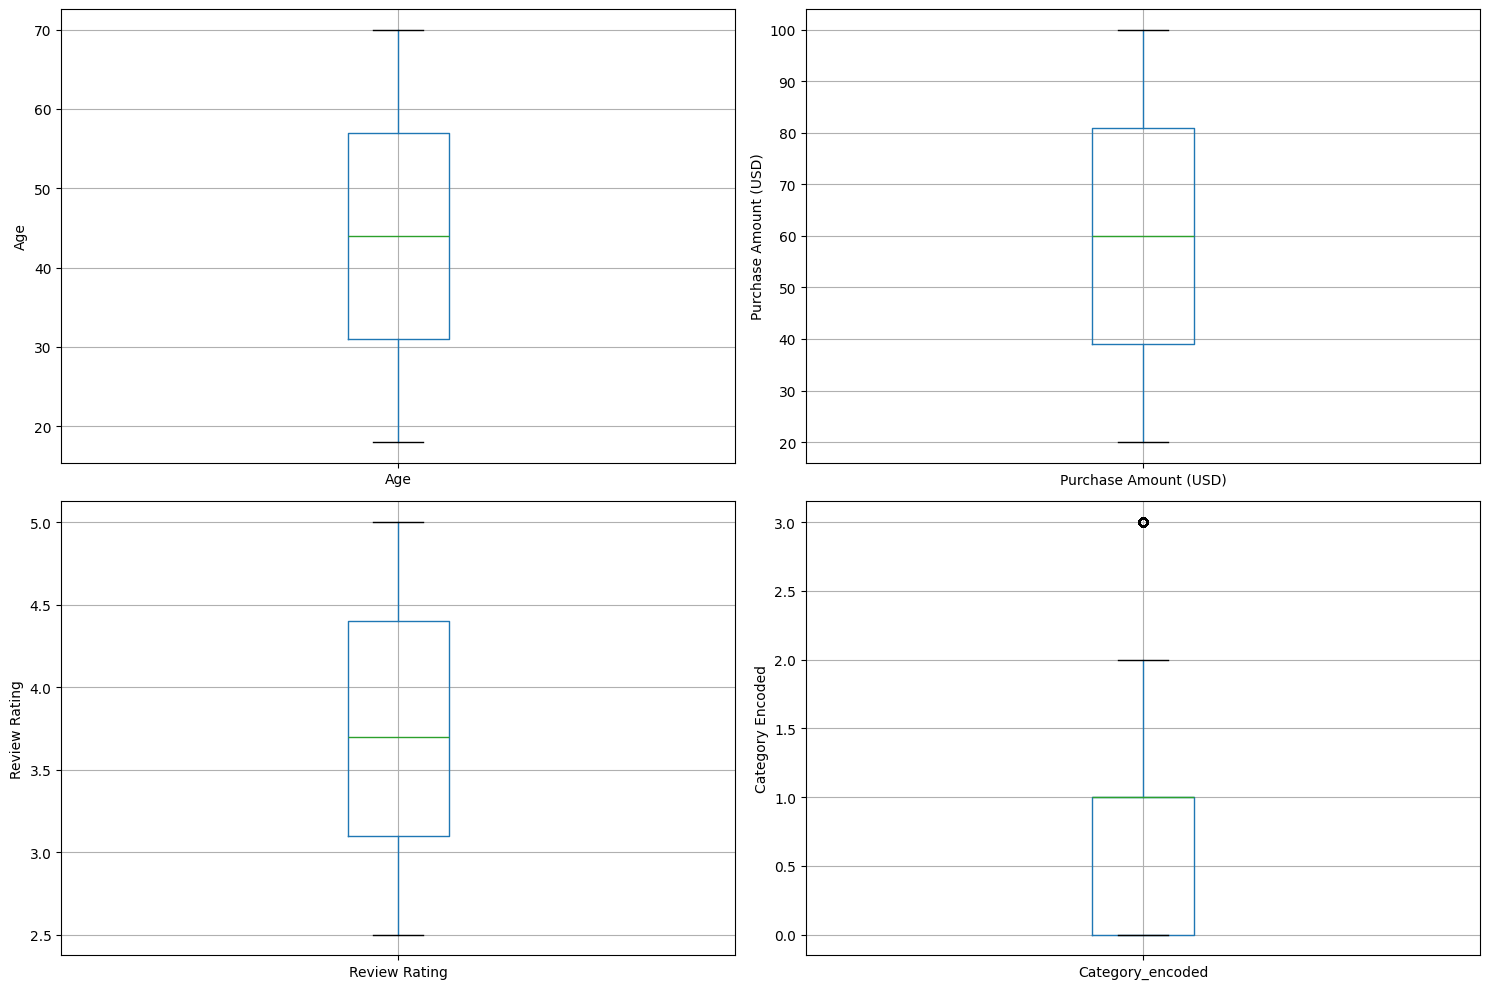

In [ ]:
# Boxplot for numerical variables
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
df.boxplot(column='Age')
plt.title('')
plt.ylabel('Age')

plt.subplot(2, 2, 2)
df.boxplot(column='Purchase Amount (USD)')
plt.title('')
plt.ylabel('Purchase Amount (USD)')

plt.subplot(2, 2, 3)
df.boxplot(column='Review Rating')
plt.title('')
plt.ylabel('Review Rating')

plt.subplot(2, 2, 4)
df.boxplot(column='Category_encoded')
plt.title('')
plt.ylabel('Category Encoded')

plt.tight_layout()
plt.show()

Interprestasi Boxplot

- Age:
Nilai tengah (median) usia pelanggan berada di sekitar 40-an tahun.
Sebaran usia cukup luas dengan kuartil pertama sekitar 30-an tahun dan kuartil ketiga di sekitar 50-an tahun.
Tidak ada outlier yang terdeteksi.


- Purchase Amount (USD):
Median pembelian sekitar $60.
Sebagian besar transaksi berada dalam rentang $40 hingga $80.
Tidak ada outlier yang signifikan.


- Review Rating:
Sebaran skor ulasan berada di antara 3 hingga 4,5 dengan beberapa nilai ekstrem.
Tidak ada outlier yang signifikan.


- Category Encoded:
Sebagian besar data berada di kategori 1.
Ada sedikit outlier di kategori 2.

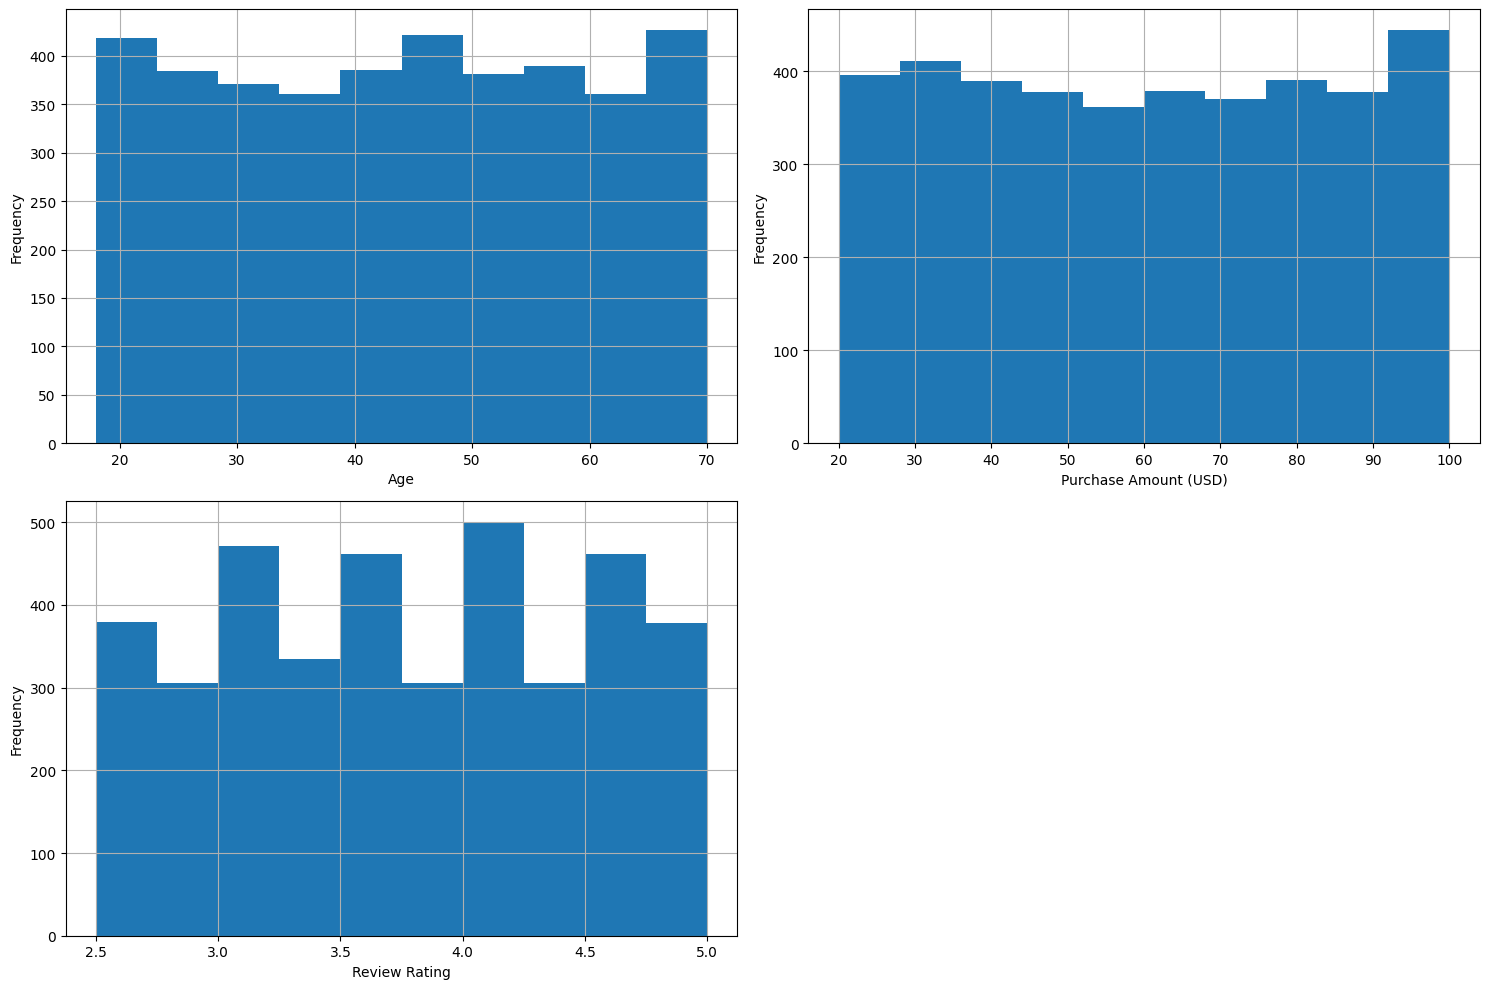

In [ ]:
# 10. Histograms to check distribution
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
df['Age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
df['Purchase Amount (USD)'].hist(bins=10)
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
df['Review Rating'].hist(bins=10)
plt.xlabel('Review Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Interprestasi Histogram

- Age:
Distribusi usia pelanggan relatif merata, tetapi lebih banyak pelanggan yang berusia di atas 50 tahun.
Jumlah pelanggan tertinggi terdapat pada rentang usia 60-70 tahun.

- Purchase Amount (USD): Distribusi jumlah pembelian cukup merata dengan puncak di sekitar $80 hingga $100.
Tidak ada pola yang mencolok di antara berbagai rentang harga.

- Review Rating:Distribusi ulasan menunjukkan bahwa skor rata-rata berkisar antara 3 hingga 4,5.
Skor ulasan 3,5 dan 4 tampaknya memiliki frekuensi yang lebih tinggi dibandingkan skor lainnya.

In [ ]:
# Find IQR for 'Age'
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
Lower_fence = df['Age'].quantile(0.25) - (IQR * 3)
Upper_fence = df['Age'].quantile(0.75) + (IQR * 3)
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Age outliers are values < -47.0 or > 135.0


In [ ]:
# Find IQR for 'Customer age'
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
Lower_fence = df['Age'].quantile(0.25) - (IQR * 3)
Upper_fence = df['Age'].quantile(0.75) + (IQR * 3)
print('Customer age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Customer age outliers are values < -47.0 or > 135.0


In [ ]:
# Find IQR for 'Income'
IQR = df['Purchase Amount (USD)'].quantile(0.75) - df['Purchase Amount (USD)'].quantile(0.25)
Lower_fence = df['Purchase Amount (USD)'].quantile(0.25) - (IQR * 3)
Upper_fence = df['Purchase Amount (USD)'].quantile(0.75) + (IQR * 3)
print('Income outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Income outliers are values < -87.0 or > 207.0


In [ ]:
# Find IQR for 'Review Rating'
IQR = df['Review Rating'].quantile(0.75) - df['Review Rating'].quantile(0.25)
Lower_fence = df['Review Rating'].quantile(0.25) - (IQR * 3)
Upper_fence = df['Review Rating'].quantile(0.75) + (IQR * 3)
print('Credit score outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Credit score outliers are values < -0.8000000000000007 or > 8.3


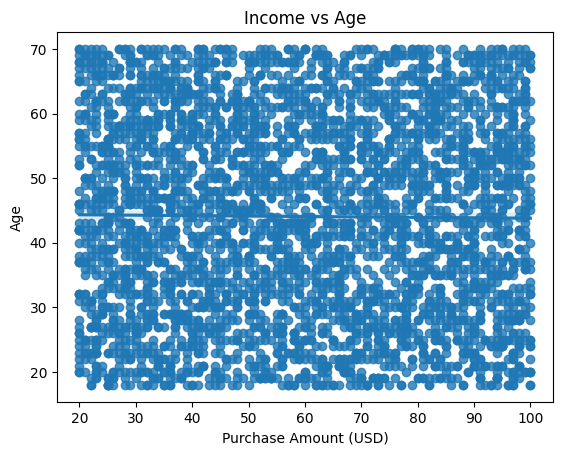

In [ ]:
# Scatterplot
sns.regplot(x='Purchase Amount (USD)', y='Age', data=df)
plt.title('Income vs Age')
plt.show()

Interprestasi Scatterplot:

Income vs Age
Hubungan antara usia dan jumlah pembelian (Purchase Amount) tidak menunjukkan pola yang jelas, yang mengindikasikan bahwa jumlah pembelian tidak tergantung secara signifikan pada usia.
Sebaran pembelian mencakup berbagai rentang usia dari 20 hingga 70 tahun, dengan jumlah pembelian berkisar antara $20 hingga $100.

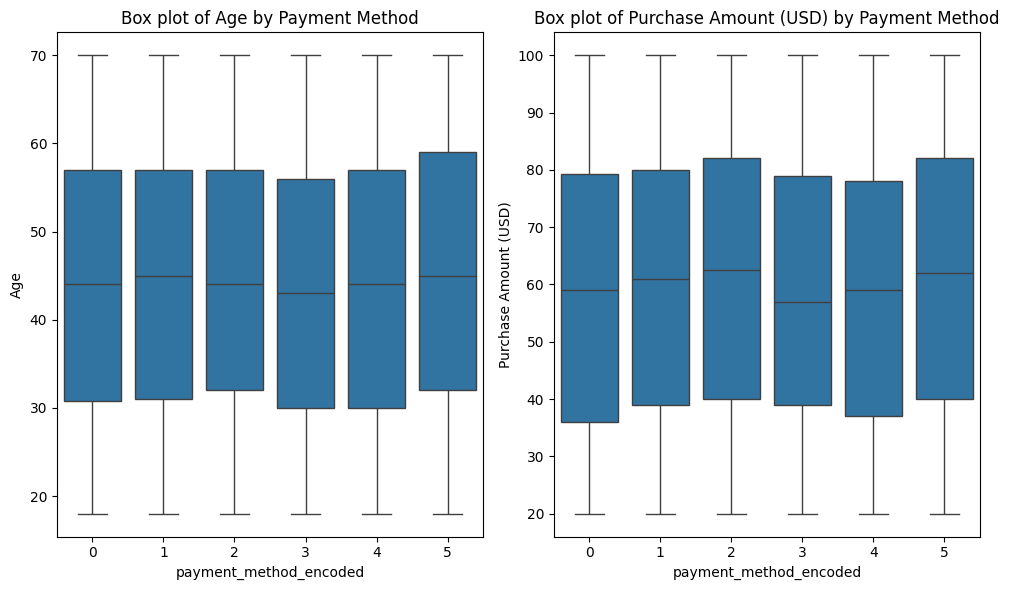

In [ ]:
# Boxplots for numerical columns
plt.figure(figsize=(10, 6))

for i, col in enumerate(['Age', 'Purchase Amount (USD)'], 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='payment_method_encoded', y=col, data=df)
    plt.title(f"Box plot of {col} by Payment Method")

plt.tight_layout()
plt.show()

Interprestasi Boxplot:

Boxplot of Age by Payment Method:

- Usia pelanggan relatif konsisten di berbagai metode pembayaran.

- Median usia pelanggan untuk semua metode berada di kisaran 40-50 tahun.

- Rentang usia pelanggan mencakup kelompok usia muda hingga tua tanpa adanya perbedaan mencolok antar metode pembayaran.


Boxplot of Purchase Amount (USD) by Payment Method:

- Median jumlah pembelian relatif serupa di semua metode pembayaran, berada di kisaran $60-$70.

- Metode pembayaran tertentu memiliki variabilitas yang lebih besar pada jumlah pembelian, seperti pada metode 3 dan 4.

- Tidak ada outlier signifikan untuk jumlah pembelian berdasarkan metode pembayaran.

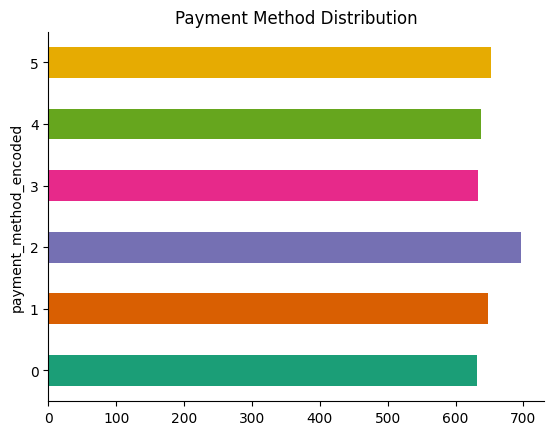

In [ ]:
# Bar plot
df.groupby('payment_method_encoded').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.title('Payment Method Distribution')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

Interprestasi Bar Chart: Payment Method Distribution

Distribusi Metode Pembayaran:

- Metode pembayaran dengan label 5 adalah yang paling sering digunakan, dengan jumlah transaksi tertinggi lebih dari 700.

- Metode pembayaran lainnya (0, 1, 2, 3, 4) memiliki distribusi yang relatif seimbang, tetapi masing-masing di bawah 700 transaksi.

- Metode pembayaran 1 dan 3 memiliki jumlah transaksi paling sedikit dibandingkan yang lain.

## Building Model

In [ ]:
X = df.drop(columns=['payment_method_encoded'])
y = df['payment_method_encoded']

In [ ]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Customer ID',
 'Age',
 'Purchase Amount (USD)',
 'Review Rating',
 'Previous Purchases',
 'Category_encoded',
 'item',
 'subscription_status_encoded']

In [ ]:
X_train[numerical].isnull().sum()

,0
Customer ID,0
Age,0
Purchase Amount (USD),0
Review Rating,0
Previous Purchases,0
Category_encoded,0
item,0
subscription_status_encoded,0


In [ ]:
X_test[numerical].isnull().sum()

,0
Customer ID,0
Age,0
Purchase Amount (USD),0
Review Rating,0
Previous Purchases,0
Category_encoded,0
item,0
subscription_status_encoded,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode semua kolom kategori di X_train
label_encoder = LabelEncoder()
for col in X_train.select_dtypes(include='object').columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])


In [ ]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
# make prediction

y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 1, 3, 2, 2, 2, 1, 3, 2, 2, 2, 5, 1, 5, 1, 1, 2, 5, 2, 3, 2, 5,
       2, 2, 2, 2, 1, 5, 2, 1, 2, 4, 2, 1, 1, 3, 5, 5, 5, 0, 5, 2, 2, 2,
       2, 2, 0, 4, 4, 2, 1, 5, 1, 4, 3, 1, 2, 3, 2, 4, 2, 2, 5, 1, 2, 2,
       2, 3, 2, 2, 2, 2, 5, 1, 1, 5, 4, 2, 2, 2, 2, 4, 2, 1, 2, 3, 3, 2,
       4, 5, 3, 3, 5, 2, 2, 4, 4, 4, 5, 2, 3, 3, 1, 2, 2, 5, 5, 5, 1, 1,
       3, 2, 4, 1, 5, 1, 5, 4, 5, 5, 5, 5, 2, 2, 2, 1, 1, 5, 5, 5, 5, 2,
       5, 3, 3, 2, 0, 0, 4, 2, 2, 4, 2, 3, 1, 2, 2, 0, 3, 2, 5, 1, 4, 3,
       2, 5, 3, 0, 5, 2, 3, 0, 2, 2, 5, 1, 1, 5, 5, 5, 2, 2, 3, 3, 2, 2,
       1, 1, 5, 5, 2, 1, 3, 2, 5, 5, 2, 5, 1, 1, 5, 1, 4, 5, 5, 5, 1, 5,
       5, 4, 3, 4, 5, 1, 4, 2, 1, 4, 2, 0, 5, 2, 2, 5, 4, 2, 5, 5, 4, 5,
       5, 2, 2, 1, 3, 2, 2, 5, 4, 4, 2, 1, 5, 1, 5, 2, 5, 2, 3, 2, 1, 3,
       2, 2, 2, 1, 5, 2, 4, 2, 2, 3, 5, 2, 2, 2, 2, 5, 5, 2, 4, 2, 3, 4,
       5, 3, 5, 2, 2, 4, 1, 3, 2, 5, 3, 1, 2, 2, 2, 3, 1, 5, 3, 3, 4, 3,
       2, 0, 1, 5, 1, 2, 2, 3, 2, 5, 0, 1, 3, 2, 3,

Array yang diberikan  nilai antara 0 hingga 5. Distribusinya menunjukkan keberagaman kategori, tetapi tidak cukup informasi untuk menyimpulkan perannya.

## Evaluate Model

In [ ]:
from sklearn.metrics import accuracy_score

# Accuracy score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))


Model accuracy score: 0.1654


In [ ]:
# Training and test set scores
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))


Training set score: 0.2083
Test set score: 0.1654


In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 5 18 51 17 19 29]
 [ 7 24 33 14 14 32]
 [ 6 20 51 21 16 27]
 [ 3 22 39 15 14 28]
 [ 3 22 42 16 12 28]
 [ 6 23 43 17 21 22]]

True Positives(TP) =  5

True Negatives(TN) =  24

False Positives(FP) =  18

False Negatives(FN) =  7


<Axes: >

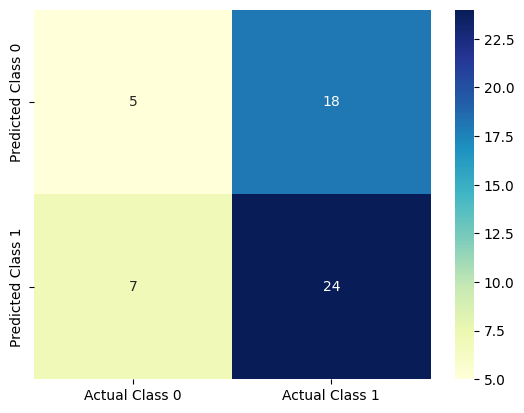

In [ ]:
import pandas as pd
import seaborn as sns

cm_subset = cm[0:2, 0:2]

# Create the DataFrame with appropriate dimensions for the subset
cm_matrix = pd.DataFrame(data=cm_subset,
                         columns=[f'Actual {label}' for label in class_labels],
                         index=[f'Predicted {label}' for label in class_labels])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.17      0.04      0.06       139
           1       0.19      0.19      0.19       124
           2       0.20      0.36      0.26       141
           3       0.15      0.12      0.14       121
           4       0.12      0.10      0.11       123
           5       0.13      0.17      0.15       132

    accuracy                           0.17       780
   macro avg       0.16      0.16      0.15       780
weighted avg       0.16      0.17      0.15       780



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.5370


In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.4630


In [ ]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.2174


In [ ]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.4167


# PREDIKSI DENGAN REGRESI LINIER

## Build Model Statsmode

In [ ]:
X = df[['Age']]
y = df['Purchase Amount (USD)']

In [ ]:
# Train-Test Split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)


In [ ]:
import statsmodels.api as sm

# Menambahkan konstanta untuk model regresi (intercept)
X_train_sm = sm.add_constant(X_train)

In [ ]:
# Melatih model regresi linier menggunakan statsmodels
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
# Menampilkan ringkasan model
print(lr.summary())

                              OLS Regression Results                             
Dep. Variable:     Purchase Amount (USD)   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.000
Method:                    Least Squares   F-statistic:                    0.4857
Date:                   Mon, 25 Nov 2024   Prob (F-statistic):              0.486
Time:                           06:44:59   Log-Likelihood:                -12509.
No. Observations:                   2730   AIC:                         2.502e+04
Df Residuals:                       2728   BIC:                         2.503e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.7351 

Interprestasi OLS Regression Results:

1. Nilai R-squared dan Adj. R-squared
R-squared: 0.000
Nilai ini menunjukkan bahwa Age tidak memiliki kontribusi signifikan dalam menjelaskan variabilitas dari variabel dependen Purchase Amount (USD). Artinya, hubungan antara kedua variabel sangat lemah. Model ini hanya mampu menjelaskan 0% dari variasi Purchase Amount (USD) berdasarkan Age.

  Adjusted R-squared: -0.000
  Nilai ini memperhitungkan jumlah variabel dalam model dan menunjukkan performa model setelah penyesuaian. Nilai negatif menunjukkan bahwa menambahkan variabel independen (dalam hal ini hanya Age) tidak meningkatkan prediksi dari model.

2. Koefisien (Intercept dan Age)
Intercept (const): 58.7351
Jika Age adalah 0, maka prediksi rata-rata dari Purchase Amount (USD) adalah 58.74. Nilai ini adalah titik awal model regresi linier.

  Age (slope): 0.0209
  Koefisien untuk Age adalah 0.0209, yang menunjukkan bahwa untuk setiap kenaikan 1 unit Age, Purchase Amount (USD) hanya meningkat sebesar 0.021 USD. Nilai ini menunjukkan hubungan yang sangat kecil antara usia dengan jumlah pembelian.

3. p-value untuk Age
p-value: 0.486
Karena nilai p-value jauh lebih besar dari 0.05 (batas signifikansi umum), koefisien untuk Age tidak signifikan secara statistik. Ini berarti tidak ada cukup bukti untuk menyatakan bahwa Age memengaruhi Purchase Amount (USD).
4. Prob (F-statistic): 0.486
Probabilitas F-statistik sebesar 0.486 (lebih besar dari 0.05) menunjukkan bahwa model secara keseluruhan tidak signifikan. Ini mengindikasikan bahwa variabel independen Age tidak memberikan penjelasan yang signifikan terhadap variabel dependen Purchase Amount (USD).
5. Durbin-Watson: 1.955
Nilai ini berada di sekitar 2, yang menunjukkan bahwa tidak ada autokorelasi signifikan dalam residual (kesalahan prediksi). Ini berarti asumsi independensi residual terpenuhi.
6. Omnibus dan Jarque-Bera
Omnibus dan Jarque-Bera tests menunjukkan bahwa residual tidak berdistribusi normal. Hal ini ditunjukkan oleh nilai probabilitas yang sangat kecil (p-value mendekati 0). Meskipun demikian, ini tidak selalu berarti bahwa model buruk, tetapi ini perlu diperhatikan jika data memiliki pola non-linear.


Kesimpulan
Hubungan sangat lemah antara Age dan Purchase Amount (USD):
Berdasarkan hasil regresi ini, usia tidak memiliki pengaruh yang signifikan terhadap jumlah pembelian.


In [ ]:
# Mendapatkan parameter regresi (intercept dan slope)
intercept, slope = lr.params
print(f"Intercept: {intercept}, Slope: {slope}")

Intercept: 58.735103609194425, Slope: 0.020945592310849935


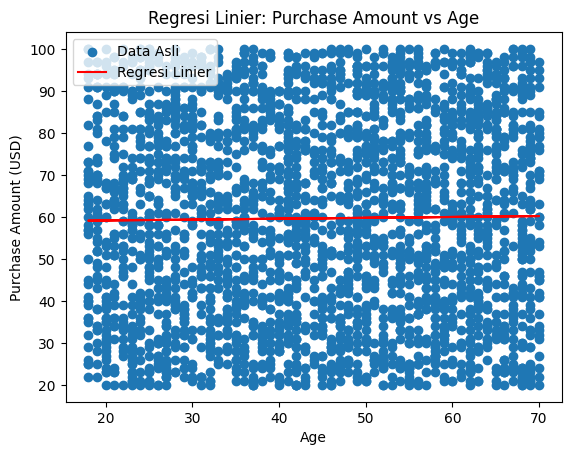

In [ ]:
# Visualisasi hasil regresi
plt.scatter(X_train, y_train, label="Data Asli")
plt.plot(X_train, intercept + slope * X_train, color='red', label="Regresi Linier")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.title("Regresi Linier: Purchase Amount vs Age")
plt.legend()
plt.show()

Interpretasi Visual:

Jika titik-titik data tersebar cukup dekat dengan garis merah, model memiliki fit yang baik.

Jika banyak titik jauh dari garis, ini menunjukkan bahwa ada variabel lain yang memengaruhi hasil (selain Age).

## Build Model Scikitlearn

In [ ]:
X = df[['Age']]
y = df['Purchase Amount (USD)']

In [ ]:
# Train-Test Split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [ ]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print the intercept and coefficient
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 58.73510360919442
Coefficient: 0.020945592310850084


Interpresentasi  Intercept dan Koefisien

- Intercept: Nilai konstanta yang diperoleh (contoh: 58.7351) menunjukkan bahwa jika usia (Age) adalah nol, maka rata-rata nilai prediksi Purchase Amount (USD) adalah sekitar nilai intercept tersebut. Namun, dalam konteks ini, usia nol tidak relevan secara logis, jadi intercept lebih digunakan untuk menghitung prediksi.

- Koefisien: Koefisien yang diperoleh (contoh: 0.0209) menunjukkan bahwa untuk setiap peningkatan usia sebesar 1 tahun, rata-rata Purchase Amount (USD) meningkat sebesar 0.0209 unit (atau 2,09 sen). Koefisien kecil ini menunjukkan hubungan yang sangat lemah antara usia dan jumlah pembelian.

In [ ]:
# Predict the purchase amounts for the test set
y_pred = model.predict(X_test)

# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

      Actual  Predicted
1726      28  59.929002
3339      99  59.154015
779       94  59.991839
366       36  60.075622
1048      77  59.363471


In [ ]:
# Plot the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Simple Linear Regression: Age vs. Purchase Amount')
plt.legend()
plt.show()

Interprestasi
- Scatter plot (titik biru): Menampilkan nilai aktual Purchase Amount (USD) terhadap Age.

- Regression line (garis merah): Menampilkan garis terbaik yang dihasilkan oleh model. Garis ini menunjukkan hubungan linier antara usia dan jumlah pembelian berdasarkan model.

Observasi dari Plot:

Garis regresi cenderung horizontal, yang menunjukkan bahwa Age hampir tidak berpengaruh pada Purchase Amount (USD).
Banyak titik data (nilai aktual) yang berada jauh dari garis regresi, menandakan bahwa model ini tidak dapat menjelaskan variabilitas dalam data dengan baik.

## Evaluate Model Statsmodel

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

<ipython-input-301-18430177a6b9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


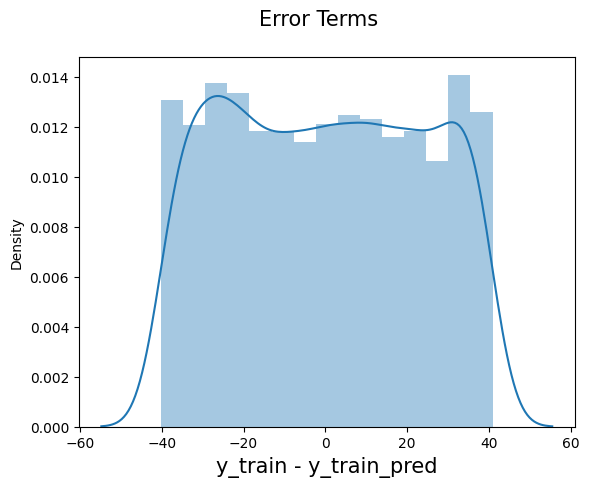

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

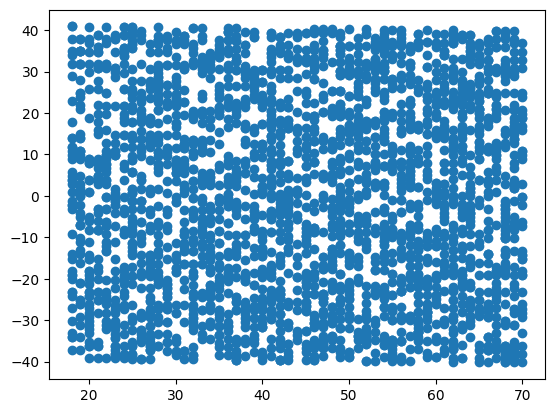

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [ ]:
!pip install scikit-learn
from sklearn.metrics import mean_squared_error
import numpy as np

# mean squared error
np.sqrt(mean_squared_error(y_test, y_pred))

23.78980919698585

In [ ]:
from sklearn.metrics import r2_score

# R-squared
r_squared = r2_score(y_test, y_pred)
r_squared

-0.0021331541129829823

Interpretasi R-Squared Nilai mendekati nol atau negatif seperti ini menandakan bahwa model bahkan memberikan hasil yang lebih buruk daripada tebakan sederhana berdasarkan rata-rata target

## Evaluate Model Scikitlearn

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

Mean Squared Error: 565.9550216289925
R-squared score: -0.0021331541129829823
